### Welch Method for Fourier Transforms

Sampling frequency: $ fs = 10000$

First tone:  $f1$ = 1234 and  $amp1$ = 2.82842712474619

Second tone: $f2$ = 2500.2157 and $amp2$ = 1

ADC resolution: $ulsb$ = 1e-3


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

[ 0.      0.0001  0.0002  0.0003  0.0004]


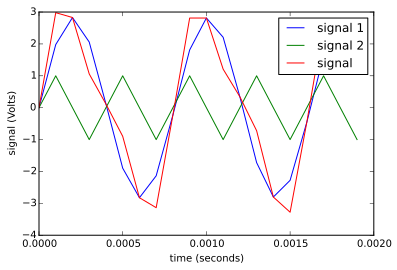

In [17]:
fs = 10000.0 # sample rate in Hz
nSample = 1000000 # number of samples
times = np.arange(nSample)/fs # time (in seconds) of each sample
print times[:5] # print the first 5 times

f1 = 1234
amp1 =  2.82842712474619
f2 = 2500.2157
amp2 = 1
ulsb = 1e-3

signal1 = amp1*np.sin(2*np.pi*times*f1)
signal2 = amp2*np.sin(2*np.pi*times*f2)
signal = np.floor(0.5+(signal1 + signal2)/ulsb)*ulsb
nToPlot = 20
plt.plot(times[:nToPlot], signal1[:nToPlot], label="signal 1")
plt.plot(times[:nToPlot], signal2[:nToPlot], label="signal 2")
plt.plot(times[:nToPlot], signal[:nToPlot], label="signal")
plt.xlabel("time (seconds)")
plt.ylabel("signal (Volts)")
plt.legend()

In [15]:
nperseg = 3328
f, psd = welch(signal, fs=fs, nperseg=nperseg, noverlap=nperseg/2, scaling='density')
f, ps = welch(signal, fs=fs, nperseg=nperseg, noverlap=nperseg/2, scaling='spectrum')



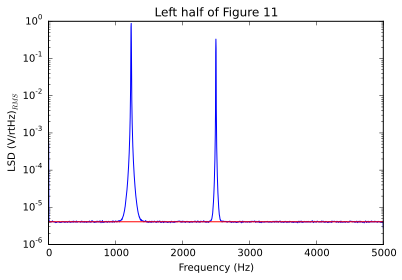

In [22]:
# Left side of Figure 11
plt.semilogy(f/1000,np.sqrt(psd))
udigPredicted = ulsb/np.sqrt(6*fs)
#print "udigPredicted=",udigPredicted
plt.axhline(udigPredicted, color='red')
plt.xlabel("Frequency (kHz)")
plt.ylabel("LSD (V/rtHz)$_{RMS}$")
t = plt.title("Left half of Figure 11")
plt.savefig("left-half.png")


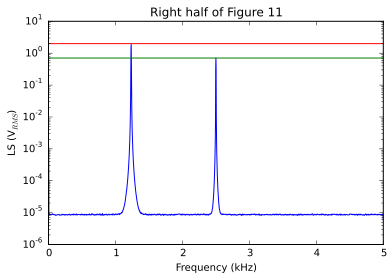

In [27]:
plt.semilogy(f/1000,np.sqrt(ps))
plt.axhline(amp1/np.sqrt(2), color='r')
plt.axhline(amp2/np.sqrt(2), color='g')
plt.xlabel("Frequency (kHz)")
plt.ylabel("LS (V$_{RMS}$)")
t = plt.title("Right half of Figure 11")
plt.savefig("right-half.png")